<a href="https://colab.research.google.com/github/Bor-Cherng/Bor-Cherng-SQL-Python-Projects/blob/main/4_What_and_Where_are_the_World's_Oldest_Businesses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. The oldest business in the world
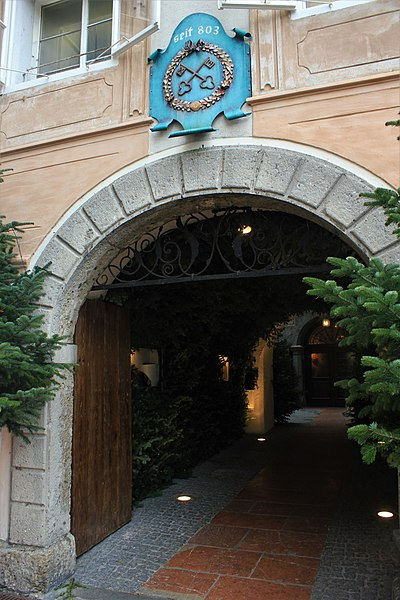
<p><em>Image: St. Peter Stiftskeller, founded 803. Credit: <a href="https://commons.wikimedia.org/wiki/File:Eingang_zum_St._Peter_Stiftskeller.jpg">Pakeha</a>.</em></p>
<p>An important part of business is planning for the future and ensuring that the company survives changing market conditions. Some businesses do this really well and last for hundreds of years.</p>
<p>BusinessFinancing.co.uk <a href="https://businessfinancing.co.uk/the-oldest-company-in-almost-every-country">researched</a> the oldest company that is still in business in (almost) every country and compiled the results into a dataset. In this project, you'll explore that dataset to see what they found.</p>
<p>The database contains three tables.</p>
<h3 id="categories"><code>categories</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>category_code</code></td>
<td>varchar</td>
<td>Code for the category of the business.</td>
</tr>
<tr>
<td style="text-align:left;"><code>category</code></td>
<td>varchar</td>
<td>Description of the business category.</td>
</tr>
</tbody>
</table>
<h3 id="countries"><code>countries</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>country_code</code></td>
<td>varchar</td>
<td>ISO 3166-1 3-letter country code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>country</code></td>
<td>varchar</td>
<td>Name of the country.</td>
</tr>
<tr>
<td style="text-align:left;"><code>continent</code></td>
<td>varchar</td>
<td>Name of the continent that the country exists in.</td>
</tr>
</tbody>
</table>
<h3 id="businesses"><code>businesses</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>business</code></td>
<td>varchar</td>
<td>Name of the business.</td>
</tr>
<tr>
<td style="text-align:left;"><code>year_founded</code></td>
<td>int</td>
<td>Year the business was founded.</td>
</tr>
<tr>
<td style="text-align:left;"><code>category_code</code></td>
<td>varchar</td>
<td>Code for the category of the business.</td>
</tr>
<tr>
<td style="text-align:left;"><code>country_code</code></td>
<td>char</td>
<td>ISO 3166-1 3-letter country code.</td>
</tr>
</tbody>
</table>
<p>Let's begin by looking at the range of the founding years throughout the world.</p>

In [ ]:
%%sql
postgresql:///oldestbusinesses

-- Select the oldest and newest founding years from the businesses table
SELECT MIN(year_founded), MAX(year_founded)
FROM businesses

1 rows affected.


min,max
578,1999


## 2. How many businesses were founded before 1000?
<p>Wow! That's a lot of variation between countries. In one country, the oldest business was only founded in 1999. By contrast, the oldest business in the world was founded back in 578. That's pretty incredible that a business has survived for more than a millennium.</p>
<p>I wonder how many other businesses there are like that.</p>

In [ ]:
%%sql

-- Get the count of rows in businesses where the founding year was before 1000
SELECT COUNT(*)
FROM businesses
WHERE year_founded < 1000


 * postgresql:///oldestbusinesses
1 rows affected.


count
6


## 3. Which businesses were founded before 1000?
<p>Having a count is all very well, but I'd like more detail. Which businesses have been around for more than a millennium?</p>

In [ ]:
%%sql

-- Select all columns from businesses where the founding year was before 1000
-- Arrange the results from oldest to newest
SELECT *
FROM businesses
WHERE year_founded < 1000
ORDER BY year_founded ASC

 * postgresql:///oldestbusinesses
6 rows affected.


business,year_founded,category_code,country_code
Kongō Gumi,578,CAT6,JPN
St. Peter Stifts Kulinarium,803,CAT4,AUT
Staffelter Hof Winery,862,CAT9,DEU
Monnaie de Paris,864,CAT12,FRA
The Royal Mint,886,CAT12,GBR
Sean's Bar,900,CAT4,IRL


## 4. Exploring the categories
<p>Now we know that the oldest, continuously operating company in the world is called Kongō Gumi. But was does that company do? The category codes in the <code>businesses</code> table aren't very helpful: the descriptions of the categories are stored in the <code>categories</code> table.</p>
<p>This is a common problem: for data storage, it's better to keep different types of data in different tables, but for analysis, you want all the data in one place. To solve this, you'll have to join the two tables together.</p>

In [ ]:
%%sql

-- Select business name, founding year, and country code from businesses; and category from categories
-- where the founding year was before 1000, arranged from oldest to newest
SELECT b.business, b.year_founded, b.country_code, c.category
FROM businesses AS b
INNER JOIN categories AS c
ON b.category_code = c.category_code
WHERE b.year_founded < 1000
ORDER BY b.year_founded ASC

 * postgresql:///oldestbusinesses
6 rows affected.


business,year_founded,country_code,category
Kongō Gumi,578,JPN,Construction
St. Peter Stifts Kulinarium,803,AUT,"Cafés, Restaurants & Bars"
Staffelter Hof Winery,862,DEU,"Distillers, Vintners, & Breweries"
Monnaie de Paris,864,FRA,Manufacturing & Production
The Royal Mint,886,GBR,Manufacturing & Production
Sean's Bar,900,IRL,"Cafés, Restaurants & Bars"


## 5. Counting the categories
<p>With that extra detail about the oldest businesses, we can see that Kongō Gumi is a construction company. In that list of six businesses, we also see a café, a winery, and a bar. The two companies recorded as "Manufacturing and Production" are both mints. That is, they produce currency.</p>
<p>I'm curious as to what other industries constitute the oldest companies around the world, and which industries are most common.</p>

In [ ]:
%%sql

-- Select the category and count of category (as "n")
-- arranged by descending count, limited to 10 most common categories
SELECT c.category, COUNT(c.category) AS n
FROM businesses AS b
INNER JOIN categories AS c
ON b.category_code = c.category_code
GROUP BY c. category
ORDER BY n DESC
LIMIT 10;

 * postgresql:///oldestbusinesses
10 rows affected.


category,n
Banking & Finance,37
"Distillers, Vintners, & Breweries",22
Aviation & Transport,19
Postal Service,16
Manufacturing & Production,15
Media,7
Agriculture,6
"Cafés, Restaurants & Bars",6
Food & Beverages,6
Tourism & Hotels,4


## 6. Oldest business by continent
<p>It looks like "Banking &amp; Finance" is the most popular category. Maybe that's where you should aim if you want to start a thousand-year business.</p>
<p>One thing we haven't looked at yet is where in the world these really old businesses are. To answer these questions, we'll need to join the <code>businesses</code> table to the <code>countries</code> table. Let's start by asking how old the oldest business is on each continent.</p>

In [ ]:
%%sql

-- Select the oldest founding year (as "oldest") from businesses,
-- and continent from countries
-- for each continent, ordered from oldest to newest
SELECT MIN(b.year_founded) AS oldest, continent
FROM businesses AS b
INNER JOIN countries AS co
ON b.country_code = co.country_code
GROUP BY continent
ORDER BY oldest ASC

 * postgresql:///oldestbusinesses
6 rows affected.


oldest,continent
578,Asia
803,Europe
1534,North America
1565,South America
1772,Africa
1809,Oceania


## 7. Joining everything for further analysis
<p>Interesting. There's a jump in time from the older businesses in Asia and Europe to the 16th Century oldest businesses in North and South America, then to the 18th and 19th Century oldest businesses in Africa and Oceania. </p>
<p>As mentioned earlier, when analyzing data it's often really helpful to have all the tables you want access to joined together into a single set of results that can be analyzed further. Here, that means we need to join all three tables.</p>

In [ ]:
%%sql

-- Select the business, founding year, category, country, and continent
SELECT business, year_founded, category, country, continent
FROM businesses AS b
INNER JOIN categories AS c
ON b.category_code = c.category_code
INNER JOIN countries AS co
ON b.country_code = co.country_code

 * postgresql:///oldestbusinesses
163 rows affected.


business,year_founded,category,country,continent
Spinzar Cotton Company,1930,Agriculture,Afghanistan,Asia
ALBtelecom,1912,Telecommunications,Albania,Europe
Andbank,1930,Banking & Finance,Andorra,Europe
Liwa Chemicals,1939,Manufacturing & Production,United Arab Emirates,Asia
Bank of the Province of Buenos Aires,1822,Banking & Finance,Argentina,South America
Yerevan Ararat Brandy-Wine-Vodka Factory,1877,"Distillers, Vintners, & Breweries",Armenia,Asia
Australia Post,1809,Postal Service,Australia,Oceania
St. Peter Stifts Kulinarium,803,"Cafés, Restaurants & Bars",Austria,Europe
Azerbaijan Caspian Shipping Company,1858,Aviation & Transport,Azerbaijan,Asia
Brarudi,1955,"Distillers, Vintners, & Breweries",Burundi,Africa


## 8. Counting categories by continent
<p>Having <code>businesses</code> joined to <code>categories</code> and <code>countries</code> together means we can ask questions about both these things together. For example, which are the most common categories for the oldest businesses on each continent?</p>

In [ ]:
%%sql

-- Count the number of businesses in each continent and category
SELECT co.continent, c.category, COUNT(b.business) AS n
FROM businesses AS b
INNER JOIN countries AS co
ON b.country_code = co.country_code
INNER JOIN categories AS c
ON b.category_code = c.category_code
GROUP BY continent, category

 * postgresql:///oldestbusinesses
56 rows affected.


continent,category,n
North America,Banking & Finance,4
Oceania,Postal Service,1
South America,Food & Beverages,2
Europe,Tourism & Hotels,2
Asia,Media,1
Europe,Medical,1
Asia,Defense,1
Africa,Manufacturing & Production,1
Europe,Postal Service,4
North America,Aviation & Transport,2


## 9. Filtering counts by continent and category
<p>Combining continent and business category led to a lot of results. It's difficult to see what is important. To trim this down to a manageable size, let's restrict the results to only continent/category pairs with a high count.</p>

In [ ]:
%%sql

-- Repeat that previous query, filtering for results having a count greater than 5
SELECT co.continent, c.category, COUNT(b.business) AS n
FROM businesses AS b
INNER JOIN countries AS co
ON b.country_code = co.country_code
INNER JOIN categories AS c
ON b.category_code = c.category_code
GROUP BY continent, category
HAVING COUNT(b.business) > 5
ORDER BY n DESC

 * postgresql:///oldestbusinesses
7 rows affected.


continent,category,n
Africa,Banking & Finance,17
Europe,"Distillers, Vintners, & Breweries",12
Africa,Aviation & Transport,10
Africa,Postal Service,9
Europe,Manufacturing & Production,8
Asia,Aviation & Transport,7
Asia,Banking & Finance,6
